# Unit 5 - Financial Planning

In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
import json
from datetime import datetime 
from alpaca_trade_api.rest import REST, TimeFrame

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
my_btc = 1.2 
my_eth = 5.3

In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [5]:
# Fetch current BTC price
btc_response_data = requests.get(btc_url).json()
print(json.dumps(btc_response_data, indent=2))


# Fetch current ETH price
eth_response_data = requests.get(eth_url).json()
print(json.dumps(eth_response_data, indent=2))

# Compute current value of my crpto
my_btc_value = btc_response_data["data"]["1"]["quotes"]["CAD"]["price"] * my_btc
my_eth_value = eth_response_data["data"]["1027"]["quotes"]["CAD"]["price"]  * my_eth

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

{
  "data": {
    "1": {
      "id": 1,
      "name": "Bitcoin",
      "symbol": "BTC",
      "website_slug": "bitcoin",
      "rank": 1,
      "circulating_supply": 18998587,
      "total_supply": 18998587,
      "max_supply": 21000000,
      "quotes": {
        "USD": {
          "price": 47224.0,
          "volume_24h": 23067047686,
          "market_cap": 896733288938,
          "percentage_change_1h": -0.344680861607888,
          "percentage_change_24h": -0.0336417687669891,
          "percentage_change_7d": 10.3317881001487,
          "percent_change_1h": -0.344680861607888,
          "percent_change_24h": -0.0336417687669891,
          "percent_change_7d": 10.3317881001487
        },
        "CAD": {
          "price": 59100.836,
          "volume_24h": 28868410179.029,
          "market_cap": 1122261711105.91,
          "percent_change_1h": -0.344680861607888,
          "percent_change_24h": -0.0336417687669891,
          "percent_change_7d": 10.3317881001487
        }
      }

### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [6]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [7]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Verify that Alpaca key and secret were correctly loaded
print(f"Alpaca Key type: {alpaca_api_key}")
print(f"Alpaca Secret Key type: {alpaca_secret_key}")

# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

Alpaca Key type: PKMQW5X1S1IH6XQFFEUS
Alpaca Secret Key type: FSMB1LncqYEhyy0d4mvO0J3ZKO9Jm1JhvzzUV3Jt


In [8]:
def subtract_days(num_of_days):
    earlier_date =  pd.to_datetime('now').floor('d') - pd.offsets.Day(num_of_days)
    earlier_date_iso = pd.Timestamp(earlier_date, tz="America/New_York").isoformat()
    return earlier_date_iso

def subtract_years(num_of_years):
    # if we want current time, use datetime.now()
    past_date = pd.to_datetime('now').floor('d') - pd.DateOffset(years=num_of_years)
    #earlier_date =  pd.to_datetime('now').floor('d') - pd.offsets.Year(num_of_years)
    earlier_date_iso = pd.Timestamp(past_date, tz="America/New_York").isoformat()
    return earlier_date_iso

today = subtract_days(0)
yesterday = subtract_days(1)
day_before_yesterday = subtract_days(2)
print(f"today is {today}, yesterday is {yesterday}")

date_year_old = subtract_years(1)
print(date_year_old)
    

today is 2022-03-31T00:00:00-04:00, yesterday is 2022-03-30T00:00:00-04:00
2021-03-31T00:00:00-04:00


In [9]:
# Format current date as ISO format
current_date = datetime.now()
print(f"current date is {current_date}")
today = pd.Timestamp(current_date, tz="America/New_York").isoformat()
print(f"current date in ISO format is {today}")
# Set the tickers
tickers = ["AGG", "SPY"]

start_date = pd.Timestamp("2022-03-27", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2022-03-27", tz="America/New_York").isoformat()


# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)

#sometimes, not getting data for today or yesterday (depending on what time API was executed), so getting 
#the closing price at day before yesterday
df_portfolio = alpaca.get_bars(tickers, TimeFrame.Day,day_before_yesterday, adjustment='raw').df

# Preview DataFrame
df_portfolio
#df_portfolio.index = df_portfolio.index.date


current date is 2022-03-30 23:04:09.468680
current date in ISO format is 2022-03-30T23:04:09.468680-04:00


,open,high,low,close,volume,trade_count,vwap,symbol
timestamp,,,,,,,,
2022-03-29 04:00:00+00:00,106.61,106.890,106.455,106.86,11372744,33570,106.734228,AGG
2022-03-30 04:00:00+00:00,106.60,107.150,106.590,107.15,11530712,24959,107.007592,AGG
2022-03-29 04:00:00+00:00,461.75,462.070,457.180,461.55,86315479,735659,459.632252,SPY
2022-03-30 04:00:00+00:00,460.29,461.195,456.465,458.70,79547916,658047,459.159522,SPY


In [10]:
# Pick AGG and SPY close prices
df_portfolio = df_portfolio[['close','symbol']]
df_portfolio
agg_close_price = df_portfolio.iloc[0]['close']
agg_close_price
spy_close_price = df_portfolio.iloc[1]['close']
# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $106.86
Current SPY closing price: $107.15


In [11]:
# Compute the current value of shares
my_spy_value  = my_spy*spy_close_price
my_agg_value = my_agg*agg_close_price

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $5357.50
The current value of your 200 AGG shares is $21372.00


### Savings Health Analysis

In [12]:
# Set monthly household income
monthly_income =12000

# Consolidate financial assets data
total_value_shares = my_spy_value + my_agg_value
total_value_crypto = my_btc_value + my_eth_value


amount_data ={"amount":[total_value_crypto,total_value_shares]}

financial_asset_categories = ["crypto","shares"]

# Create savings DataFrame
df_savings = pd.DataFrame(amount_data, index=financial_asset_categories)

# Display savings DataFrame
display(df_savings)

,amount
crypto,93514.820785
shares,26729.500000


<AxesSubplot:title={'center':'Composition of Personal Savings'}, ylabel='amount'>

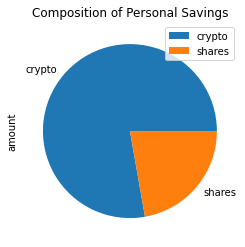

In [13]:
# Plot savings pie chart
df_savings.plot.pie(y="amount", title="Composition of Personal Savings")

In [14]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

msg_enough_money= "Congratultions! You having enough money in this fund"
msg_reached_financial_goal="Congratultions!  you have reached your financial goal"
msg_away_from_goal_by =" You are away from reaching the goal by amount of :"

# Calculate total amount of savings
total_savings = total_value_shares + total_value_crypto

# Validate saving health - this is the amount that is more or less than the emergency fund
saving_health = total_savings - emergency_fund

if(total_savings>emergency_fund):
    print(msg_enough_money)
elif (total_savings == emergency_fund):
     print(msg_reached_financial_goal)
else:
    print(msg_away_from_goal_by + str(-(saving_health)))


Congratultions! You having enough money in this fund


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [15]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
#Hard coded values are used below , but dynamic values based on current date can be used as well, 
# using the function defined above i.e subtract_years(0) to get today and subtract_years(5) to get date 5 years back

start_date = pd.Timestamp('2017-03-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2022-03-01', tz='America/New_York').isoformat()

In [16]:
# Get 5 years' worth of historical data for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
# YOUR CODE HERE!

df_stock_data = alpaca.get_bars(tickers, TimeFrame.Day,start_date,end_date, adjustment='raw').df

# Display sample data
df_stock_data.head()

SPY = df_stock_data[df_stock_data['symbol']=='SPY'].drop('symbol', axis=1)
AGG = df_stock_data[df_stock_data['symbol']=='AGG'].drop('symbol', axis=1)


# Concatenate the ticker DataFrames
df_ticker = pd.concat([SPY, AGG], axis=1, keys=["SPY",  "AGG"])

# Display sample data
df_ticker.head()


SPY                                     \
                             open    high     low   close     volume   
timestamp                                                              
2017-03-01 05:00:00+00:00  238.40  240.32  238.37  239.78  149158170   
2017-03-02 05:00:00+00:00  239.57  239.57  238.21  238.27   70245978   
2017-03-03 05:00:00+00:00  238.19  238.61  237.73  238.42   81974300   
2017-03-06 05:00:00+00:00  237.48  238.12  237.01  237.71   55391533   
2017-03-07 05:00:00+00:00  237.39  237.77  236.76  237.00   65103737   

                                                      AGG                      \
                          trade_count        vwap    open      high       low   
timestamp                                                                       
2017-03-01 05:00:00+00:00      344253  238.913316  108.13  108.1369  107.9800   
2017-03-02 05:00:00+00:00      246411  238.809756  107.93  107.9900  107.7513   
2017-03-03 05:00:00+00:00      211686  238.302476  107.92  107.9700  107.7400   
2017-03-06 05:00:00+00:00      181334  237.695276  107.94  107.9900  107.8200   
2017-03-07 05:00:00+00:00      188508  237.236180  107.80  107.8400  107.6900   

                                                                    
                            close   volume trade_count        vwap  
timestamp                                                           
2017-03-01 05:00:00+00:00  108.04  3280167       13692  108.052477  
2017-03-02 05:00:00+00:00  107.84  2299703       10821  107.843015  
2017-03-03 05:00:00+00:00  107.92  4293867       17373  107.883517  
2017-03-06 05:00:00+00:00  107.87  3678302       13782  107.880650  
2017-03-07 05:00:00+00:00  107.73  2237937        9271  107.742308

In [17]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns

num_of_simulation =500
num_of_years =30


MC_30year = MCSimulation(
    portfolio_data = df_ticker,
    weights = [.5,.5],
    num_simulation = num_of_simulation,
    num_trading_days = 252*num_of_years
)


In [18]:
# Printing the simulation input data

MC_30year.portfolio_data.head()


SPY                                     \
                             open    high     low   close     volume   
timestamp                                                              
2017-03-01 05:00:00+00:00  238.40  240.32  238.37  239.78  149158170   
2017-03-02 05:00:00+00:00  239.57  239.57  238.21  238.27   70245978   
2017-03-03 05:00:00+00:00  238.19  238.61  237.73  238.42   81974300   
2017-03-06 05:00:00+00:00  237.48  238.12  237.01  237.71   55391533   
2017-03-07 05:00:00+00:00  237.39  237.77  236.76  237.00   65103737   

                                                                   AGG  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2017-03-01 05:00:00+00:00      344253  238.913316          NaN  108.13   
2017-03-02 05:00:00+00:00      246411  238.809756    -0.006297  107.93   
2017-03-03 05:00:00+00:00      211686  238.302476     0.000630  107.92   
2017-03-06 05:00:00+00:00      181334  237.695276    -0.002978  107.94   
2017-03-07 05:00:00+00:00      188508  237.236180    -0.002987  107.80   

                                                                            \
                               high       low   close   volume trade_count   
timestamp                                                                    
2017-03-01 05:00:00+00:00  108.1369  107.9800  108.04  3280167       13692   
2017-03-02 05:00:00+00:00  107.9900  107.7513  107.84  2299703       10821   
2017-03-03 05:00:00+00:00  107.9700  107.7400  107.92  4293867       17373   
2017-03-06 05:00:00+00:00  107.9900  107.8200  107.87  3678302       13782   
2017-03-07 05:00:00+00:00  107.8400  107.6900  107.73  2237937        9271   

                                                    
                                 vwap daily_return  
timestamp                                           
2017-03-01 05:00:00+00:00  108.052477          NaN  
2017-03-02 05:00:00+00:00  107.843015    -0.001851  
2017-03-03 05:00:00+00:00  107.883517     0.000742  
2017-03-06 05:00:00+00:00  107.880650    -0.000463  
2017-03-07 05:00:00+00:00  107.742308    -0.001298

In [19]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_30year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/sameerlakhe/bootcamp_fintech/05-API-Homework/05_APIs_Financial_Planning/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.002800,1.001723,0.997560,0.999707,1.011154,0.996477,1.011492,1.000246,0.997399,0.998039,...,0.999314,0.995151,0.998704,1.009635,1.006888,0.997134,0.993699,0.994769,0.995248,0.994088
2,1.004683,1.015280,0.997545,0.998189,1.012560,0.991282,1.020812,0.994819,0.997793,1.000825,...,0.998734,0.997435,1.001992,1.020969,1.013594,1.001605,0.982363,0.998227,0.986460,0.994622
3,1.000115,1.024358,0.998709,1.006177,1.020108,0.985431,1.027405,0.989173,0.999143,0.998483,...,0.999815,1.000062,0.996321,1.024729,1.006857,1.006996,0.979513,0.994312,0.987558,0.996099
4,0.991141,1.022287,1.003636,0.997035,1.023328,0.987080,1.018248,0.978258,1.000301,0.999666,...,1.001408,0.996474,0.993765,1.024021,1.002510,1.007057,0.982536,1.001583,0.982089,0.990982
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,8.302112,15.285373,6.563775,7.172454,11.938901,6.646626,6.429481,5.912629,5.979628,7.453462,...,8.699587,5.457909,5.591838,4.428875,4.005338,15.565143,10.609315,9.495354,10.365739,6.370897
7557,8.339990,15.264360,6.517604,7.165958,11.917495,6.624610,6.448770,5.886871,6.014948,7.389768,...,8.663132,5.460322,5.635561,4.403484,3.989831,15.590906,10.639834,9.449574,10.337766,6.364524
7558,8.385952,15.186236,6.564443,7.196046,11.948581,6.636979,6.462369,5.898913,5.996779,7.411101,...,8.644171,5.412124,5.609797,4.410301,4.019324,15.616437,10.609203,9.593733,10.270831,6.360894
7559,8.418166,15.098686,6.603126,7.204689,11.941850,6.740510,6.424160,5.877995,5.942505,7.420728,...,8.687976,5.418286,5.608039,4.422722,4.034315,15.664508,10.626015,9.555354,10.275398,6.365268


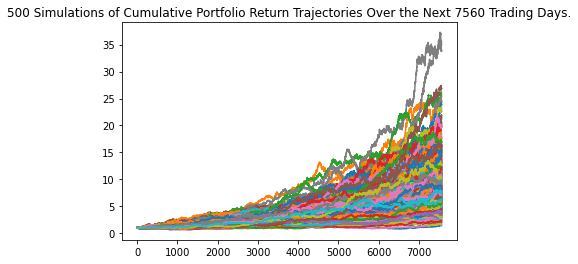

In [20]:
# Plot simulation outcomes
line_plot = MC_30year.plot_simulation()
line_plot.get_figure().savefig("MC_30year_sim_plot.png", bbox_inches="tight")

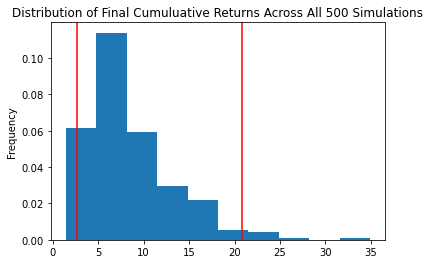

In [21]:
# Plot probability distribution and confidence intervals
dist_plot = MC_30year.plot_distribution()
dist_plot.get_figure().savefig('MC_30year_dist_plot.png',bbox_inches='tight')

### Retirement Analysis

In [22]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_30year.summarize_cumulative_return()

# Print summary statistics
print(tbl)

count           500.000000
mean              8.492485
std               4.800474
min               1.422062
25%               5.114702
50%               7.248221
75%              10.633385
max              34.926838
95% CI Lower      2.708126
95% CI Upper     20.861955
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [23]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(tbl[8]*initial_investment,2)
ci_upper = round(tbl[9]*initial_investment,2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $54162.52 and $417239.1


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [24]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(tbl[8]*initial_investment,2)
ci_upper = round(tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $81243.78 and $625858.65


## Optional Challenge - Early Retirement


### Five Years Retirement Option

***The Optional chanllge is done by defining a function that takes all required parameters and then executing the same steps as above i.e 1) running the Monte Carlo simulations 2) calculating cumulative returns 3) Summarizing the cumulative retuns and 4) calculating the lower/upper bound range at 95% confidence***

***This function is invoked 2 times for period of 5 years and 10 years and using different weights.
This function, however does not plot the graps as they overlap and we are mostly interested in the final outcome of lower/upper bound returns***

***The same stuff is also done again after that, but in different cells and graps are plotted for 5 and 10 years for 60000 initial investment***


In [25]:
def forecast_cumulative_returns(num_of_years, weights=[0.5,0.5],number_of_simulations=500,initial_investment=60000):
    # Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
    MC_x_year = MCSimulation(
    portfolio_data = df_ticker,
    weights = weights,
    num_simulation = number_of_simulations,
    num_trading_days = 252*num_of_years)
               
    # Running a Monte Carlo simulation to forecast 5 years cumulative returns
    MC_x_year.calc_cumulative_return()
    # Plot simulation outcomes
    #line_plot_x_year = MC_x_year.plot_simulation()

    # Plot probability distribution and confidence intervals
    #dist_plot_x_year = MC_x_year.plot_distribution()
  
    # Fetch summary statistics from the Monte Carlo simulation results
    tbl_x_year = MC_x_year.summarize_cumulative_return()

    # Print summary statistics
    #print(tbl_x_year)


    # Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
    ci_lower_x_years = round(tbl_x_year[8]*initial_investment,2)
    ci_upper_x_years = round(tbl_x_year[9]*initial_investment,2)

    # Print results
    print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_x_years} and ${ci_upper_x_years}")

In [26]:
num_of_years =5 
weights=[1,0]
number_of_simulations=500
initial_investment=60000
forecast_cumulative_returns(num_of_years,weights,number_of_simulations,initial_investment)

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/sameerlakhe/bootcamp_fintech/05-API-Homework/05_APIs_Financial_Planning/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

***Simplyfy simulation for 10 years and 60000 investment by invoking the function with required parameters**

In [27]:
num_of_years =10
weights=[.7,.3]
number_of_simulations=500
initial_investment=60000
forecast_cumulative_returns(num_of_years,weights,number_of_simulations,initial_investment)

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

***The simulation is repeated below for 5 and 10 years for initial investment of 60000, but without the use of the function like it was done for 30 year period in different cells and plotting the graphs***

In [28]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
num_of_years=5
MC_5year = MCSimulation(
    portfolio_data = df_ticker,
    weights = [1,0],
    num_simulation = num_of_simulation,
    num_trading_days = 252*num_of_years
)

In [29]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_5year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.002029,1.023587,1.015700,1.018721,1.002664,1.007467,1.010407,1.012519,1.007396,1.004036,...,1.002592,0.989873,0.998052,1.012620,1.007571,1.001230,0.993685,0.990114,1.016493,1.001064
2,1.004753,1.024106,1.014474,1.015597,0.999533,1.014001,1.012794,1.020835,0.991353,0.999198,...,0.980477,1.004954,0.999799,1.024897,1.021545,1.003190,1.008144,0.995900,1.035654,0.999565
3,0.985169,1.019667,1.025734,1.024586,1.005218,1.008099,1.024195,1.007161,1.003565,0.983023,...,0.964772,1.000360,0.988037,1.018044,1.013924,1.002770,0.995733,0.978596,1.037331,1.016156
4,0.987148,1.024646,1.012909,1.029451,0.987212,1.018387,1.032749,1.032223,0.983314,0.961158,...,0.979530,0.999092,1.006109,1.026823,1.003110,1.007155,0.990060,0.988260,1.004937,1.041669
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.630504,1.542124,2.479795,1.465505,0.744458,2.238785,4.089104,1.183526,1.967616,1.614939,...,3.922289,1.935328,1.825251,2.428904,1.139524,1.713637,1.490823,1.774256,1.602109,0.963059
1257,1.611403,1.510423,2.483137,1.478322,0.740986,2.220052,4.045206,1.189096,1.991272,1.641795,...,3.989932,1.900736,1.810611,2.440501,1.137751,1.752988,1.489674,1.779060,1.623301,0.948633
1258,1.606481,1.491743,2.445153,1.500695,0.731835,2.225147,4.051749,1.195359,1.948316,1.654082,...,3.969360,1.893245,1.787564,2.419381,1.135849,1.768949,1.483351,1.799816,1.613033,0.944490
1259,1.595939,1.460503,2.488508,1.514079,0.712612,2.207254,4.051915,1.188466,1.928253,1.658969,...,4.070894,1.923122,1.750275,2.390971,1.156209,1.756022,1.472528,1.775607,1.618673,0.931849


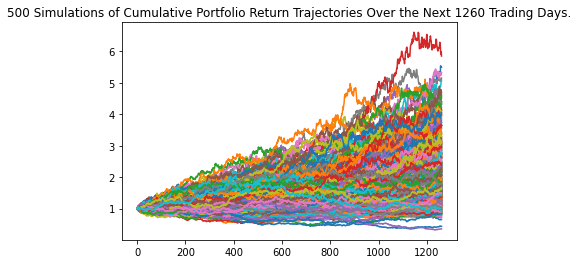

In [30]:
# Plot simulation outcomes
line_plot_5year = MC_5year.plot_simulation()
#line_plot_5year.get_figure().savefig("MC_5year_sim_plot.png", bbox_inches="tight")

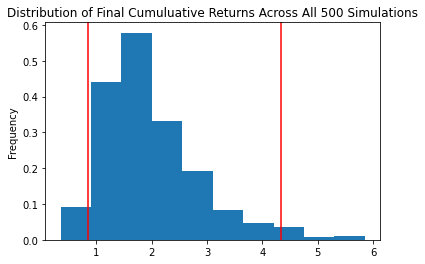

In [31]:
# Plot probability distribution and confidence intervals
dist_plot_5year = MC_5year.plot_distribution()
#dist_plot_5year.get_figure().savefig('MC_5year_dist_plot.png',bbox_inches='tight')

In [32]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl_5year = MC_5year.summarize_cumulative_return()

# Print summary statistics
print(tbl_5year)

count           500.000000
mean              1.982211
std               0.880256
min               0.352699
25%               1.392544
50%               1.743562
75%               2.382966
max               5.853239
95% CI Lower      0.841321
95% CI Upper      4.333762
Name: 1260, dtype: float64


In [33]:
# Set initial investment
initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five = round(tbl_5year[8]*initial_investment,2)
ci_upper_five = round(tbl_5year[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $50479.29 and $260025.71


### Ten Years Retirement Option

In [34]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
num_of_years=10
MC_10year = MCSimulation(
    portfolio_data = df_ticker,
    weights = [.7,.3],
    num_simulation = num_of_simulation,
    num_trading_days = 252*num_of_years
)

In [35]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_10year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/sameerlakhe/bootcamp_fintech/05-API-Homework/05_APIs_Financial_Planning/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.991497,0.992211,1.006755,1.010481,0.995688,1.003399,1.003562,1.009800,1.012216,1.013617,...,1.004569,0.991722,1.005935,0.991603,1.002104,1.003140,1.002546,0.989711,1.014536,0.989137
2,0.990703,0.987683,1.014012,1.013506,0.988528,1.001637,1.012884,1.002501,1.025067,1.015031,...,1.015907,1.003691,0.999405,0.991365,1.003461,0.998959,0.991498,0.970540,0.995847,0.989832
3,0.993905,0.976070,1.008662,1.011551,0.975940,0.997178,1.023728,0.992956,1.023102,1.027327,...,1.026335,1.012684,0.988587,0.988912,1.006170,1.005425,0.975445,0.974281,0.991317,0.980369
4,1.000876,0.964949,1.013924,0.994392,0.972574,0.994197,1.004024,1.001237,1.025556,1.021877,...,1.027234,1.016811,0.976519,0.986036,0.990582,1.011861,0.977803,0.967073,0.991745,0.989587
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,1.017657,2.953454,2.235650,3.856826,1.634338,2.945819,3.187793,1.607865,1.626686,2.008049,...,2.978406,1.416421,2.613129,7.010930,4.022081,1.860220,2.375828,3.334829,2.153097,0.972258
2517,1.019655,2.937327,2.256822,3.855449,1.620182,2.953202,3.214174,1.613061,1.635706,2.005517,...,2.950588,1.434626,2.640003,6.980734,3.971203,1.855509,2.376920,3.373139,2.191931,0.982494
2518,1.021791,2.968579,2.258978,3.806061,1.609912,2.948905,3.175486,1.599828,1.662159,2.021469,...,2.945738,1.441262,2.611432,6.929653,3.957459,1.854673,2.374604,3.345456,2.198206,0.971782
2519,1.017023,2.932424,2.263534,3.827366,1.612330,2.947260,3.186399,1.579457,1.662831,2.039103,...,2.953727,1.458581,2.645944,6.882776,3.980583,1.869474,2.394851,3.361957,2.210004,0.981077


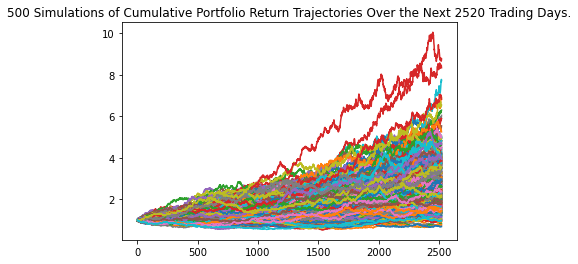

In [36]:
# Plot simulation outcomes
line_plot_10year = MC_10year.plot_simulation()
#line_plot_10year.get_figure().savefig("MC_10year_sim_plot.png", bbox_inches="tight")

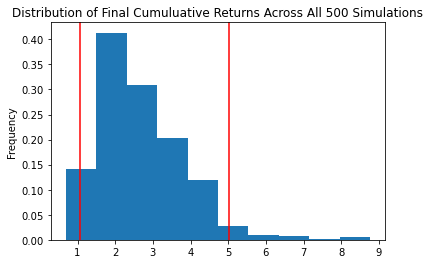

In [37]:
# Plot probability distribution and confidence intervals
dist_plot_10year = MC_10year.plot_distribution()
#dist_plot_10year.get_figure().savefig('MC_10year_dist_plot.png',bbox_inches='tight')

In [38]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl_10year = MC_10year.summarize_cumulative_return()

# Print summary statistics
print(tbl_10year)

count           500.000000
mean              2.678750
std               1.142598
min               0.687566
25%               1.847290
50%               2.419242
75%               3.328423
max               8.768572
95% CI Lower      1.055430
95% CI Upper      5.024898
Name: 2520, dtype: float64


In [39]:
# Set initial investment
initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten = round(tbl_10year[8]*initial_investment,2)
ci_upper_ten = round(tbl_10year[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 10 years will end within in the range of $63325.81 and $301493.88


**The simulations were executed for the different combinations of amount/period and distribution of stocks and bonds.
The output is mentioned below for reference**

1 - is the original investment (of 20K) for period of 30 years with 60% in stocks and 40% in bonds.
in order to get the same kinds of return in shorter duration of 5 years, the amount was 100% invested in stocks, but it (`$238468.7`) does not come close to the upper range of `$376615.03`

The investment of 60K for 10 years with 70% in stocks and 30% in bonds has better chance of matching the original investment of 20K for 30 years as it's lower bound `$62604.69` is higher than `$43930.33` and its upper bound of `$340764.29` is close to the upper bound `$376615.03` of 30 year investment. Since it is still 30% invested in bounds it is relatively safer than 100% stock investment for 5 years as well.

**Output of Monte Carlo simulations ( values will differ on subsequent runs)**

*1-There is a 95% chance that an initial investment of `$20000` in the portfolio over the next 30 years will end within in the range of `$43930.33` and `$376615.03`*

*2- There is a 95% chance that an initial investment of `$60000` in the portfolio over the next 5 years will end within in the range of `$47169.04` and `$238468.7`*

*3-There is a 95% chance that an initial investment of `$60000` in the portfolio over the next 10 years will end within in the range of `$62604.69` and `$340764.29`*